<a href="https://colab.research.google.com/github/rezar12/ANN/blob/master/FINALEMATETUDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**DATA PROCESSING PART 1**

1.   IMPORTATION DE LA MATRICE
2.   CONSTRUCTION DU VECTEUR LIGNÉE
3.   CODIFICATION DE LA MATRICE
4.   RECUPERATION DES LIGNÉES A PLUS DE 20 SEQUENCE



In [331]:
# importation des liubrairies
import pandas as pd
import numpy as np


# importation des données
matricesnps = pd.read_table("/content/drive/MyDrive/Matrice de SNPS meoire master/MATRICESNPSFINALE.tsv")
variants = pd.read_table("/content/drive/MyDrive/Matrice de SNPS meoire master/lignéeparnom_accession.tsv")


In [332]:
# recuperer l'ensemble des numero d'accession dans la matrice de snps
liste = matricesnps.columns
liste=liste [3:]

In [333]:
# recuperer l'ensemble des elements de la colonne non_accession 
liste2 = variants['nom accession']
listesequence2 = []
for element in liste2:
    listesequence2.append(element)

In [334]:
# virification que les elements des liste sont les mêmes 
set(listesequence2)-set(liste)

set()

In [335]:
# transposition de la matrice de snps
matricesnps = matricesnps.T

In [336]:
matricesnps.shape

(578, 3454)

In [337]:
'''
renomer les colonnes en SNPx ou x est inclus dans [0 , 3454] ou 3454 est le nombres de SNPs
pour se faire nous utilisons une fonction anonyme 'lambda' qui faire pour l'ensemble des colonnes de la
matrice une association de la chaine "SNP" plus le numero de la colonnes pour en sortie avoir les colonnes 
type SNPn ou n est le numero de la colonnes i ...

'''
nums = range(len(matricesnps.columns))
allsnps = list(map(lambda num: "SNP"+str(num) , nums))


In [338]:
# créer un dico ou la clé est numero de la colonne et la valeur le nom de la nouvelle colonne
colnew = dict(zip(nums, allsnps))

In [339]:
# pour les types dataframe la ronimation peut etre faite de manière simple grace a la methode rename
matricesnps = matricesnps.rename(columns=colnew)

In [340]:
# fusion de deux matrices celle portant les lignées et celle des SNPs grace a la methode d'ajout de colonne
# pour la fusion retirons les colonnes non concerné càd chromosome, position et Reference

Matrice = matricesnps.iloc[3:,:]
variantsadd = variants.iloc[:,-1]



In [341]:
# crée une liste en retirant l'espace blanc sur chaque element de la liste DE VARIANTS
addlignee = []
for element in variantsadd:
    addlignee.append(element.replace(" ",""))

In [342]:
addlignee

['B.1.2',
 'B.1.1',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.596',
 'B.1.596',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.234',
 'B.1.429',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.596',
 'B.1.234',
 'B.1.126',
 'B.1.582',
 'B.1.429',
 'B.1.2',
 'B.1.1.519',
 'B.1.2',
 'B.1.1.222',
 'B.1.2',
 'B.1.1.316',
 'B.1.2',
 'B.1.429',
 'B.1.1.222',
 'B.1.596',
 'B.1.111',
 'B.1.1.7',
 'B.1.596',
 'B.1.582',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.404',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.596',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.1.362',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.1.434',
 'B.1.243',
 'B.1.2',
 'B.1.596',
 'B.1.1.519',
 'B.1.2',
 'B.1.1.518',
 'B.1.1.519',
 'B.1.1',
 'B.1.2',
 'B.1.429',
 'B.1.2',
 'B.1.429',
 'B.1.2',
 'B.1.596',
 'B.1.596',
 'B.1.2',
 'B.1.2',
 'B.1.234',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'B.1.1',
 'R.1',
 'B.1.1.434',
 'B.1.2',
 'B.1.2',
 'B.1.2',
 'P.2',
 'B.1.396',
 'B.1.2',
 'B.1.596',
 'B.1.596',
 'B.1.596'

In [343]:
Matrice["lignée"]=addlignee

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [344]:
#codification de la matrice en 0 et 1 
Matrice=Matrice.replace(np.nan,int(0))
Matrice=Matrice.replace(["T","A","G","C"],int(1))

In [345]:
Matrice

,SNP0,SNP1,SNP2,SNP3,SNP4,SNP5,SNP6,SNP7,SNP8,SNP9,SNP10,SNP11,SNP12,SNP13,SNP14,SNP15,SNP16,SNP17,SNP18,SNP19,SNP20,SNP21,SNP22,SNP23,SNP24,SNP25,SNP26,SNP27,SNP28,SNP29,SNP30,SNP31,SNP32,SNP33,SNP34,SNP35,SNP36,SNP37,SNP38,SNP39,...,SNP3415,SNP3416,SNP3417,SNP3418,SNP3419,SNP3420,SNP3421,SNP3422,SNP3423,SNP3424,SNP3425,SNP3426,SNP3427,SNP3428,SNP3429,SNP3430,SNP3431,SNP3432,SNP3433,SNP3434,SNP3435,SNP3436,SNP3437,SNP3438,SNP3439,SNP3440,SNP3441,SNP3442,SNP3443,SNP3444,SNP3445,SNP3446,SNP3447,SNP3448,SNP3449,SNP3450,SNP3451,SNP3452,SNP3453,lignée
SRR14210311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,B.1.2
SRR14210312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.1
SRR14210313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.2
SRR14210314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.2
SRR14210315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR14626109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.1.7
SRR14626110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.1.7
SRR14626111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.526
SRR14626112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.1.7


In [346]:
# recuperation de la colonne lignée pour le decompte du nombre de lignée par sequence 
df=Matrice.iloc[:,-1]
df=df.value_counts()

In [347]:
dico=df.to_dict()
forgraphe = pd.DataFrame.from_dict(df)

In [348]:
# recuperation des index càd les lignée
nomligné=forgraphe.index

In [349]:
# ajout du nombre de lignée compté a une liste appélé count
count = []
for value in dico:
    count.append(dico[value])

In [350]:
# creation du dataframe lignée nombre de lignée decompté en son sains
dataviz = pd.DataFrame({"lignée":nomligné,"nombres de sequence":count})

In [351]:
# VISUALISATION DU NOMBRES DE SEQUENCE PAR LIGNÉE
import plotly.express as px


fig = px.bar(dataviz, y='nombres de sequence', x='lignée')
fig.show()

In [352]:
# recuperation des lignée les representé pour la suite de l'etude
# recuperé les lignées dont le nombre de sequence est superieur a 20
LignéEtudié = dataviz[dataviz["nombres de sequence"] > 20]

# recuperation des lignées:
recupLignée = LignéEtudié['lignée'].to_list()

In [353]:
sorted(recupLignée)

['B.1.1.7', 'B.1.2', 'B.1.427', 'B.1.429', 'B.1.596']

In [354]:
# recuperation des sequence dont la ligné est egale aux elements de la liste
# recupLignée
MATRICESNPSFINALE = Matrice[
        (Matrice['lignée']=='B.1.596') |
        (Matrice['lignée']=='B.1.1.7') | 
        (Matrice['lignée']=='B.1.2')   |
        (Matrice['lignée']=='B.1.429') |
        (Matrice['lignée']=='B.1.427')
        ]

In [355]:
# SEVEGARDE DE LA MATRICE AU FORMAT CSV

MATRICESNPSFINALE.to_csv("MatriceFinaleEtude.csv")

In [356]:
# taille de la matrice
MATRICESNPSFINALE.shape

(485, 3455)

##**DATA PROCESSING PART 2**

1.   OBSERVATION DES SNPS
2.   SPLITAGE DE LA MATRICE EN X (UNE MATRICE DE VARIABLES INDEPENDANTES) ET EN Y (LA CIBLE)
3.   ENCODAGE DES CLASSE SUIVIS DU SPLITAGE DU JEU EN DONNÉES D'ENTRAINEMENT ET DE TEST



In [357]:
MATRICESNPSFINALE

,SNP0,SNP1,SNP2,SNP3,SNP4,SNP5,SNP6,SNP7,SNP8,SNP9,SNP10,SNP11,SNP12,SNP13,SNP14,SNP15,SNP16,SNP17,SNP18,SNP19,SNP20,SNP21,SNP22,SNP23,SNP24,SNP25,SNP26,SNP27,SNP28,SNP29,SNP30,SNP31,SNP32,SNP33,SNP34,SNP35,SNP36,SNP37,SNP38,SNP39,...,SNP3415,SNP3416,SNP3417,SNP3418,SNP3419,SNP3420,SNP3421,SNP3422,SNP3423,SNP3424,SNP3425,SNP3426,SNP3427,SNP3428,SNP3429,SNP3430,SNP3431,SNP3432,SNP3433,SNP3434,SNP3435,SNP3436,SNP3437,SNP3438,SNP3439,SNP3440,SNP3441,SNP3442,SNP3443,SNP3444,SNP3445,SNP3446,SNP3447,SNP3448,SNP3449,SNP3450,SNP3451,SNP3452,SNP3453,lignée
SRR14210311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,B.1.2
SRR14210313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.2
SRR14210314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.2
SRR14210315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.2
SRR14210316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR14626107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.2
SRR14626108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.1.7
SRR14626109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.1.7
SRR14626110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.1.7


In [358]:
# REMARQUE LA SNP0 NE CONTIENT PAS DE VALEUR DONC AUCUNE MUTATION DU FAIT QUE LE VARIANTS ASSOCIER EST ETE 
# SUREMENT SUPPRIMER A OBSERVÉ
MATRICESNPSFINALE['SNP0'].to_list()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [359]:
# SUPPRESSION DES SNPS CONTENANT DES ELEMENTS TOUS NULL
# PRINCIPE ON CRÉE UN VECTEUR NUL PUIS ON COMPARE CE VECTEUR AU VECTEUR EXTRAIRE POUR CHAQUE SNPS
# SI CE VECTEUR EGALE AU VECTEUR NUL ON SUPRIME LA SNP SINON ON LA GARDE
SNPdelete = []
for i in range((MATRICESNPSFINALE.shape[1]-1)):
    if (set(MATRICESNPSFINALE['SNP'+str(i)].to_list()) == set([0 for number in range(MATRICESNPSFINALE.shape[0])]))==True:
        SNPdelete.append("SNP"+str(i))

MATRICESNPSFINALE=MATRICESNPSFINALE.drop(columns=SNPdelete)


In [360]:
# MATRICE RESULTANT A OBSERVÉ
MATRICESNPSFINALE

,SNP1,SNP2,SNP3,SNP5,SNP6,SNP8,SNP9,SNP10,SNP11,SNP12,SNP13,SNP14,SNP16,SNP17,SNP18,SNP19,SNP20,SNP21,SNP23,SNP25,SNP26,SNP28,SNP29,SNP30,SNP33,SNP34,SNP35,SNP37,SNP38,SNP39,SNP40,SNP41,SNP42,SNP43,SNP44,SNP45,SNP47,SNP49,SNP53,SNP55,...,SNP3399,SNP3400,SNP3403,SNP3404,SNP3405,SNP3406,SNP3407,SNP3410,SNP3411,SNP3412,SNP3413,SNP3416,SNP3417,SNP3419,SNP3420,SNP3421,SNP3423,SNP3424,SNP3425,SNP3426,SNP3429,SNP3430,SNP3431,SNP3434,SNP3436,SNP3437,SNP3438,SNP3439,SNP3440,SNP3441,SNP3442,SNP3443,SNP3444,SNP3446,SNP3447,SNP3449,SNP3450,SNP3451,SNP3453,lignée
SRR14210311,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,B.1.2
SRR14210313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.2
SRR14210314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.2
SRR14210315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.2
SRR14210316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR14626107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.2
SRR14626108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.1.7
SRR14626109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.1.7
SRR14626110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,B.1.1.7


In [361]:
# CONSTRUCTION DE LA MATRICE DE VECTEUR LINÉAIREMENT INDEPANDANT  X ET LE VECTEUR CIBLE y 
# X representante la matrice constitué de toute les lignes sauf la dernière colonne
# y la cible est la  colonne portant les lignées

X = MATRICESNPSFINALE.iloc[:,0:-1]
y = MATRICESNPSFINALE.iloc[:,-1]

In [362]:
X.shape

(485, 2624)

In [363]:
# Encodage du label lignée
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y  = pd.get_dummies(y1).values 

In [364]:
# splitage de notre jeu de données en données d' entrainements et de tests selon un ratio 80/20
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

##**MISE EN PLACE DU MODÈLE**

In [365]:
# IMPORTATION DE TENSORFLOW ET KERAS
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [366]:
# CONSTRUCTION DU MODELE AVEC L'ENSSEMBLE DES INPUTS COMME COUCHE EN ENTRER
# UNE COUCHE CACHÉ A 100 NEURONNES AYANT POUR FONCTION D'ACTIVATION RELU
# ET ENFIN UNE COUCHE DE SORTIE A 5  NEURONNES AVEC UNE FONCTION D'ACTIVATION SOFTMAX 
epochchoix = 50
model = keras.Sequential()
model.add(layers.Dense(100,input_shape=(2624,) ,activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(layers.Dense(5,activation='softmax'))

In [367]:
# UTILISATION DE LA CROSSENTROPIE ET DE L'ACCURACY POUR LES METRIQUES D'EVALUATION ET D'UN OPTIMISEUR ADAM (descente de gradient stochastique)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [368]:
# APPLIQUATION DU MODELE AU DONNÉES D'ENTRAINEMENT
history=model.fit(X_train,y_train, epochs=epochchoix)

Epoch 1/50
13/13 [==============================] - 0s 5ms/step - loss: 1.2892 - accuracy: 0.6649
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6505 - accuracy: 0.9433
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.9768
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1934 - accuracy: 0.9820
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1275 - accuracy: 0.9845
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0960 - accuracy: 0.9845
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0784 - accuracy: 0.9845
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.9845
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9871
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9845
Epoch 11/50
13/13 [

In [369]:
# EVALUATION DU MODÉLE AVEC LES DONNÉS DE TEST
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0403 - accuracy: 0.9897


[0.04033929854631424, 0.9896907210350037]

In [370]:
# fAIRE DE LA PREDICTION AVEC LES DONNÉES DE TEST 
# SACHANT QUE LES SORTIES PREDICTES SONT DES PROBALITÉ UTILISE LA FONCTION "argmax" PERMET
# DE RECUPERER LES SORTIES D'UNE MANIÉRES PLUS DIGESTE AU YEUX
# ENSUITE SI L'ON VEUT LES LABELS D'ORIGINE GRACE A INSTANTIATION DE LABELSENCODER ON PEUT 
# RETROUVER CEUX-CI
# POUR LES DONNÉES y_test D'ORIGINE ETANT ENCODÉ PAR LA SUITE GRACE AU
# GET_DUMMIES DE PANDAS L'ON CRÉE UNE LISTE PUIS STOCKE LES VALEURS ENCODÉ AUX VALEURS DES
# DU LABELENCODER ET ENFIN ONDETERMINE LES VRAI LABELS...

pred=model.predict(X_test[20:])
Y_labelencodePred=np.argmax(pred, axis=1)
result = y_test[20:]
trueencodage = []
for element in result:
    if   str(element)==str(np.array([1, 0, 0, 0, 0])):
        trueencodage.append(int(0))

    elif str(element)==str(np.array([0, 1, 0, 0, 0])):
        trueencodage.append(int(1))

    elif str(element)==str(np.array([0, 0, 1, 0, 0])):
        trueencodage.append(int(2))

    elif str(element)==str(np.array([0, 0, 0, 1, 0])):
        trueencodage.append(int(3))

    elif str(element)==str(np.array([0, 0, 0, 0, 1])):
        trueencodage.append(int(4))


Y_labelencodeVrai = np.array(trueencodage)

Y_labeldecodePred = encoder.inverse_transform(Y_labelencodePred)
Y_labeldecodeTest = encoder.inverse_transform(Y_labelencodeVrai)

In [371]:
print(Y_labeldecodePred)
print(Y_labeldecodeTest)

['B.1.429' 'B.1.1.7' 'B.1.2' 'B.1.2' 'B.1.429' 'B.1.1.7' 'B.1.596'
 'B.1.596' 'B.1.429' 'B.1.596' 'B.1.2' 'B.1.2' 'B.1.1.7' 'B.1.596'
 'B.1.596' 'B.1.1.7' 'B.1.1.7' 'B.1.1.7' 'B.1.1.7' 'B.1.427' 'B.1.596'
 'B.1.596' 'B.1.596' 'B.1.1.7' 'B.1.2' 'B.1.2' 'B.1.2' 'B.1.2' 'B.1.1.7'
 'B.1.596' 'B.1.1.7' 'B.1.596' 'B.1.1.7' 'B.1.2' 'B.1.596' 'B.1.2'
 'B.1.429' 'B.1.596' 'B.1.596' 'B.1.1.7' 'B.1.596' 'B.1.2' 'B.1.596'
 'B.1.596' 'B.1.427' 'B.1.596' 'B.1.596' 'B.1.596' 'B.1.1.7' 'B.1.2'
 'B.1.596' 'B.1.2' 'B.1.2' 'B.1.2' 'B.1.2' 'B.1.2' 'B.1.429' 'B.1.2'
 'B.1.2' 'B.1.1.7' 'B.1.2' 'B.1.596' 'B.1.2' 'B.1.2' 'B.1.2' 'B.1.1.7'
 'B.1.2' 'B.1.1.7' 'B.1.427' 'B.1.2' 'B.1.596' 'B.1.2' 'B.1.1.7' 'B.1.1.7'
 'B.1.429' 'B.1.596' 'B.1.1.7']
['B.1.429' 'B.1.1.7' 'B.1.2' 'B.1.2' 'B.1.429' 'B.1.1.7' 'B.1.596'
 'B.1.596' 'B.1.429' 'B.1.596' 'B.1.2' 'B.1.2' 'B.1.1.7' 'B.1.596'
 'B.1.596' 'B.1.1.7' 'B.1.1.7' 'B.1.1.7' 'B.1.1.7' 'B.1.427' 'B.1.596'
 'B.1.596' 'B.1.596' 'B.1.596' 'B.1.2' 'B.1.2' 'B.1.2' 'B.1.2' 'B

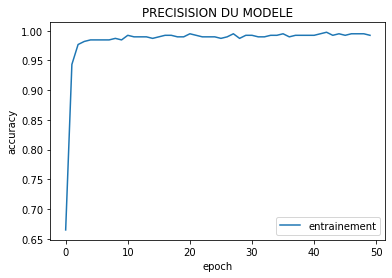

In [372]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title("PRECISISION DU MODELE")
plt.ylabel("Precision")
plt.xlabel("epoch")
plt.legend(['entrainement'],loc='lower right')
plt.show()

In [373]:
import plotly.express as px


df = pd.DataFrame(dict(
    epoch=range(epochchoix),
    precision = history.history['accuracy']
))
fig = px.line(df, x="epoch", y="precision", title="PRECISION DU MODÉLE LORS DE L'ENTRAINEMANT") 
fig.show()


In [374]:
import plotly.express as px


df = pd.DataFrame(dict(
    epoch=range(epochchoix),
    perte = history.history['loss']
))
fig = px.line(df, x="epoch", y="perte", title="PERTE DU MODÉLE LORS DE L'ENTRAINEMANT") 
fig.show()